In [203]:
#read file

def ReadFile(data_set_number):
    
    if data_set_number==0:
        file_path = 'a280-n1395.txt'
    elif data_set_number==1:    
        file_path = 'a280-n279.txt'
    elif data_set_number==2: 
        file_path = 'a280-n2790.txt'
    elif data_set_number==3: 
        file_path = 'fnl4461-n22300.txt'
    elif data_set_number==4: 
        file_path = 'fnl4461-n4460.txt'
    elif data_set_number==5:  
        file_path = 'fnl4461-n44600.txt'
    elif data_set_number==6: 
        file_path = 'pla33810-n169045.txt'
    elif data_set_number==7: 
        file_path = 'pla33810-n33809.txt'
    elif data_set_number==8: 
         file_path = 'pla33810-n338090.txt'

    with open(file_path, 'r') as file:

        file_content = file.readlines()

    problem_info = {}
    node_coord_section = []
    items_section=[]

    for line in file_content:
        line = line.strip()
        if line.startswith('PROBLEM NAME:'):
            problem_info['PROBLEM_NAME'] = line.split(':')[-1].strip()
            
        elif line.startswith('KNAPSACK DATA TYPE:'):
            problem_info['KNAPSACK_DATA_TYPE'] = line.split(':')[-1].strip()
            
        elif line.startswith('DIMENSION:'):
            problem_info['DIMENSION'] = int(line.split(':')[-1].strip())
           
        elif line.startswith('NUMBER OF ITEMS:'):
            problem_info['NUMBER_OF_ITEMS'] = int(line.split(':')[-1].strip())
            
        elif line.startswith('CAPACITY OF KNAPSACK:'):
            problem_info['CAPACITY_OF_KNAPSACK'] = int(line.split(':')[-1].strip())

        elif line.startswith('MIN SPEED:'):
            problem_info['MIN_SPEED'] = float(line.split(':')[-1].strip())
            
        elif line.startswith('MAX SPEED:'):
            problem_info['MAX_SPEED'] = float(line.split(':')[-1].strip())
          
        elif line.startswith('RENTING RATIO:'):
            problem_info['RENTING_RATIO'] = float(line.split(':')[-1].strip())
            
        elif line.startswith('EDGE_WEIGHT_TYPE:'):
            problem_info['EDGE_WEIGHT_TYPE'] = line.split(':')[-1].strip()
            
        elif line.startswith('NODE_COORD_SECTION'):
            break

    for line in file_content[len(problem_info) + 1:]:

        if line.startswith('ITEMS SECTION'):
            break

        if line.strip():
            index, x, y = map(int, line.split())
            node_coord_section.append((index, x, y))


    for line in file_content[len(node_coord_section)+len(problem_info) +2 :]:
        if line.strip():
            index, x, y, z = map(int, line.split())
            items_section.append((index, x, y,z))
    
#     print(problem_info)#--------test
#     print(node_coord_section)#--------test
#     print(items_section)#--------test
    
    dimension = problem_info['DIMENSION']
    number_of_items= problem_info['NUMBER_OF_ITEMS']
    capacity_of_knapsack = problem_info['CAPACITY_OF_KNAPSACK']
    min_speed = problem_info['MIN_SPEED']
    max_speed = problem_info['MAX_SPEED']
    renting_ration=problem_info['RENTING_RATIO']
    
    return  dimension,\
            number_of_items,\
            capacity_of_knapsack,\
            min_speed,max_speed,\
            renting_ration,\
            node_coord_section,\
            items_section

In [204]:
#Class TTPsolution
class TTPsolution:
    
    def __init__(self,value,cost_time,weight,city_list,pack_list):
        
        self.solution_value = value
        self.solution_cost_time = cost_time
        self.solution_weight = weight
        self.solution_path = city_list
        self.solution_pack = pack_list
     

In [205]:
#distance matrix[i][j]-distance--city i-->j
def BuildDistanceMatrix(city_number,node_coord_section):
    
    matrix=[]
    for i in range(city_number):        
        row = []
        for j in range(city_number):            
            if i == j:                
                row.append(0)
            else:        
                x1,y1=node_coord_section[i][1],node_coord_section[i][2]
                x2,y2=node_coord_section[j][1],node_coord_section[j][2]
                distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
                distance_rounded = round(distance, 5)
                row.append(distance_rounded)

#                 print(i,x1,y1)------------test
#                 print(j,x2,y2)
#                 print(distance)
                
        matrix.append(row)
        
    return matrix


In [206]:
#initial pherone [[1,1,1,1],[1,1,1,1]]
def InitialisPheromone(city_number):
    
    matrix=[]
    for i in range(city_number):
        row=[]
        for j in range(city_number):
            temp=[1,1,1,1]
            row.append(temp)
        matrix.append(row)
    return matrix    
       

In [207]:
#city items matrix[city_number]=[[item_number,value,weight],[item_number,value,weight]]
def BuildCityItems(city_number,items_section):
    
    temp_city_item=[]
    
    for i in range(city_number):
        
        item_profit_weight=[]
        
        for item in items_section:
            
            temp=[]
            
            if item[3]==i+1:
                
                temp.append(item[0])
                temp.append(item[1])
                temp.append(item[2])
                
                item_profit_weight.append(temp)
        temp_city_item.append(item_profit_weight)        
    return temp_city_item         


In [208]:
#BuildHeuristicMatrix 
def BuildHeuristicMatrix(city_number,city_items,distance_matrix):
    
    matrix=[]
    for i in range(city_number):        
        row = []
        for j in range(city_number):   
            
            if distance_matrix[i][j] == 0 or i == j:  
                temp=[0,0,0,0]
                row.append(temp)
                
            else:
                temp=[] 
                #Don't take anything--only distance
                temp.append(1/distance_matrix[i][j])
                
                #take item
                if city_items[j]!=[]:
                    for items in city_items[j]:

                        distance_ = 1/distance_matrix[i][j]
                        value_ = round((items[1]/items[2]),5)
                        #Problem???
                        temp.append(distance_ + value_)    
                else:
                    temp_=0
                    for items in city_items[1]:                   
                        temp.append(temp_)
                    
                row.append(temp)      
               
        matrix.append(row)
        
    return matrix


In [209]:
#calculate Transition probabilities
def TransitionProbabilities(travel_city_list,city_number,current_pheromone_matrix,current_heuristic_matrix,current_weight):
    
    current_city=travel_city_list[-1]
    pheromoneHeuristic_matrix = copy.deepcopy(current_pheromone_matrix)
    probaility_matrix=[]
 
    for i in range(city_number):
        
        if i in travel_city_list:
            
            temp=[0,0,0,0]
            pheromoneHeuristic_matrix[i]=temp
            
        else:
            temp_=[]
        
            for k in range(len(current_pheromone_matrix[current_city][i])):
                
                temp1=current_pheromone_matrix[current_city][i][k]
                temp2=current_heuristic_matrix[current_city][i][k]
               
                temp_.append(temp1**1 * temp2**2)
            pheromoneHeuristic_matrix[i]=temp_
    #print("pheromoneHeuristic_matrix",pheromoneHeuristic_matrix)         
    sum_=0

    for k in range(len(pheromoneHeuristic_matrix)):
        
        for i in range(len(pheromoneHeuristic_matrix[k])):
               
            sum_+=pheromoneHeuristic_matrix[k][i] 
    
    #print("sum",sum_)
    sum_pro=0
    
    for k in range(len(pheromoneHeuristic_matrix)):
        row=[]
        if k in travel_city_list:
            for i in range(len(pheromoneHeuristic_matrix[k])):
                row.append(0)  
                
        else:
            for i in range(len(pheromoneHeuristic_matrix[k])):
                sum_pro+=(pheromoneHeuristic_matrix[k][i]/sum_)
                row.append(sum_pro)  
            
        probaility_matrix.append(row) 
        
    #print("pro_matrix",probaility_matrix)
    rand = random.random()
    # print("random",rand) 
    
    for i in range(len(probaility_matrix)):
        for j in range(len(probaility_matrix[i])):
            if probaility_matrix[i][j]>=rand:
                return i,j  
  

In [210]:
#Update Pheromone
#Update Pheromone
def UpdatePheromone(evaporation_rate,current_pheromone_matrix,city_number,ant_number,the_evolve_solution,distance_matrix):
   
    #evaporation
    for i in range(city_number):
        
        for j in range(city_number):
            
            for t in range(len(current_pheromone_matrix[i][j])):
                
                current_pheromone_matrix[i][j][t]*=(1-evaporation_rate)
                
    sum_distance=[]
    sum_value=[]
    for i in range(ant_number):
        sum_value.append(the_evolve_solution[i].solution_value)
        sum_1=0
        
        for j in range(len(the_evolve_solution[i].solution_path)):
            
            if j==len(the_evolve_solution[i].solution_path)-1:
                
                sum_1+=distance_matrix[the_evolve_solution[i].solution_path[j]][the_evolve_solution[i].solution_path[0]]
            
            else:
                
                sum_1+=distance_matrix[the_evolve_solution[i].solution_path[j]][the_evolve_solution[i].solution_path[j+1]]
                
        sum_distance.append(sum_1)   


    for i in range(ant_number):
        temp=the_evolve_solution[i].solution_path  
        for j in range(len(the_evolve_solution[i].solution_path)):
            if j==len(the_evolve_solution[i].solution_path)-1:
                current_pheromone_matrix[temp[j]][temp[0]][k]+=1/sum_distance[i] 
            else:
                for k in range(len(current_pheromone_matrix[temp[j]][temp[j+1]])):      
                    current_pheromone_matrix[temp[j]][temp[j+1]][k]+=1/sum_distance[i]



In [211]:
#calculate CurrentSpeed
def CurrentSpeed(v_max,v_min,capacity_of_knapsack,current_weight):
    speed=None
    if current_weight<=capacity_of_knapsack:
        speed= v_max - ((current_weight/capacity_of_knapsack)*(v_max-v_min))
    else:
        speed=v_min
    if speed :
        return speed
    else:
        print("speed calculate is wrong")    

In [215]:
#UpdateBestSolution
def UpdateBestSolution(best_solution, ant_solution):
    if best_solution==[]:
        best_solution.append(ant_solution)
    else:
        for i in range(len(best_solution)):

            if  ant_solution.solution_value < best_solution[i].solution_value and ant_solution.solution_cost_time > best_solution[i].solution_cost_time:
                print("The point is completely dominated")
            elif  ant_solution.solution_value >= best_solution[i].solution_value and ant_solution.solution_cost_time <= best_solution[i].solution_cost_time:
                print("One past point is completely dominated")
                best_solution.pop(i)
                best_solution.append(ant_solution)
            else:
                best_solution.append(ant_solution)
    return best_solution

In [216]:
#UpdateHeuristicMatrix
def UpdateHeuristicMatrix(current_heuristic_matrix,city_items,capacity_of_knapsack,current_weight):
    
    for i in range(len(city_items)):
        if city_items[i]!=[]:
            for j in range(len(city_items[i])):
                
                if (current_weight+city_items[i][j][2])>capacity_of_knapsack:
                    current_heuristic_matrix[i][j+1]=0
        else:
            continue
    

the 1 ant start
1 ant finish
the 2 ant start
2 ant finish
The point is completely dominated
the 3 ant start
3 ant finish
The point is completely dominated
the 4 ant start
4 ant finish
One past point is completely dominated
the 5 ant start
5 ant finish
the 6 ant start
6 ant finish
The point is completely dominated
the 7 ant start
7 ant finish
The point is completely dominated
the 8 ant start
8 ant finish
The point is completely dominated
The point is completely dominated
the 9 ant start
9 ant finish
The point is completely dominated
One past point is completely dominated
One past point is completely dominated
One past point is completely dominated
the 10 ant start
10 ant finish
The point is completely dominated
The point is completely dominated
The point is completely dominated
The point is completely dominated
The point is completely dominated
The point is completely dominated
The point is completely dominated
The point is completely dominated
The point is completely dominated
The poin

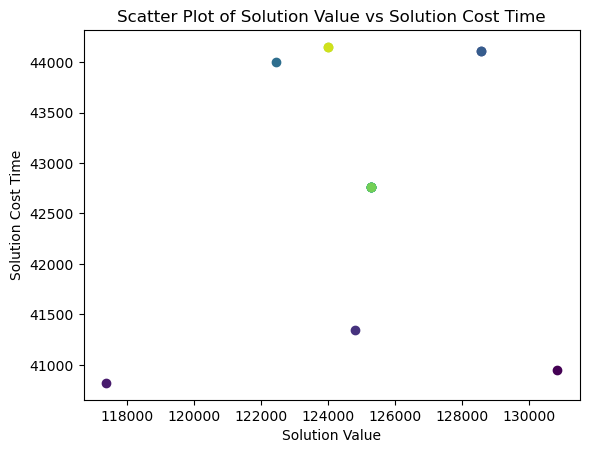

In [218]:
#mian function
import math
import random
import copy
import matplotlib.pyplot as plt
#----------------------------------------Extract data from a file-----------------------------

# print(f"""
#     a280-n1395:0
#     a280-n279:1
#     a280-n2790:2
#     fnl4461-n22300:3
#     fnl4461-n4460:4
#     fnl4461-n44600:5
#     pla33810-n169045:6
#     pla33810-n33809:7
#     pla33810-n338090:8
# """)
#the data set number
#data_set_number = input("Please enter the data set number:")
#ReadFile(data_set_number)

txt_data= ReadFile(0) #----------test

#Assign data 
city_number, number_of_items, capacity_of_knapsack, min_speed, max_speed, renting_ration, node_coord_section,\
items_section = txt_data

# Distance matrix
distance_matrix = BuildDistanceMatrix(city_number,node_coord_section)
#print(distance_matrix)

#city_item_weight_value [INDEX, PROFIT, WEIGHT]
city_items = BuildCityItems(city_number,items_section)
#print(city_items)

#Initialise Pheromone Matrix-The pheromone adds an item dimension
current_pheromone_matrix = InitialisPheromone(city_number)
#print(current_pheromone_matrix)
#--------------------------------stare Ant travel----------------------------

ant_number=10
solution=[]
best_solution=[]
number_of_iterations=1

for evolve in range(number_of_iterations):  
    ant=0
    the_evolve_solution=[]
    while(ant<ant_number):
        #----------------------one ant start------------------------
        print("the",ant+1,"ant start")
        travel_city_list=[]
        travel_package=[]
        current_speed=0
        current_weight=0
        current_value=0
        cost_time=0
        #random find start city
        first_city = random.randint(0, city_number-1)
        travel_city_list.append(first_city)
        
        #Heuristic Matrix#-----------how to choose items
        current_heuristic_matrix = BuildHeuristicMatrix(city_number,city_items,distance_matrix)
#         print("sssssssssssssssssssssssssss")
#         print(current_heuristic_matrix)
        current_speed= CurrentSpeed(max_speed,min_speed,capacity_of_knapsack,current_weight)

        for i in range(city_number-1):
            #print("the",ant+1,"travel city number",i+1)
            #-----------------------ant go to cities-------------------------
            #weight <total---item all 0
            UpdateHeuristicMatrix(current_heuristic_matrix,city_items,capacity_of_knapsack,current_weight)
    
            #calculate Transition probabilities-->next city
            next_city,next_item= TransitionProbabilities(travel_city_list,city_number,current_pheromone_matrix,current_heuristic_matrix,current_weight)
            if next_item!=0:
                
                next_item_weight = city_items[next_city][next_item][2]
                next_item_number = city_items[next_city][next_item][0]
                travel_package.append(next_item_number)
                current_weight+=next_item_weight
                cost_time+= distance_matrix[travel_city_list[-1]][next_city]/current_speed
                current_value+=city_items[next_city][next_item][1]
                
            travel_city_list.append(next_city)   
            current_speed = CurrentSpeed(max_speed,min_speed,capacity_of_knapsack,current_weight)
        print(ant+1,"ant finish")
        #-------------------------one ant finish-----------------------------
        #-----create TTP solution-----
        ant+=1
        ant_solution=TTPsolution(current_value,cost_time,current_weight,travel_city_list,travel_package)
        solution.append(ant_solution)
        the_evolve_solution.append(ant_solution)
        best_solution=UpdateBestSolution(best_solution,ant_solution)
        
    #-------------------------------every ants finished------------------------     
        #print(all_travel_city_list)
        #update pheromone
    evaporation_rate=0.5
    #print("generation",evolve,"---------------")
    UpdatePheromone(evaporation_rate,current_pheromone_matrix,city_number,ant_number,the_evolve_solution,distance_matrix)

print(len(best_solution))
for i in range(len(best_solution)):
    temp_1 = best_solution[i].solution_value
    temp_2 = best_solution[i].solution_cost_time
    color = plt.cm.viridis(i / len(best_solution))  # 使用色谱映射，确保每一次迭代使用不同颜色
    plt.scatter(temp_1, temp_2, color=color)

    
plt.title('Scatter Plot of Solution Value vs Solution Cost Time')
plt.xlabel('Solution Value')
plt.ylabel('Solution Cost Time')

# 显示图形
plt.show()    